In [ ]:
!pip install tensorflow==2.7 keras gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting uninstall: tensorflow
    Foun

In [ ]:
!gdown 1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz

Downloading...
From: https://drive.google.com/uc?id=1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz
To: /content/small_data_set.zip
100% 2.07G/2.07G [00:14<00:00, 143MB/s]


In [ ]:
import zipfile
import os
import shutil
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

from keras.utils.vis_utils import plot_model

class ImageClassifier:
    def __init__(self, zip_file_path, dataset_folder="dataset", image_size=(150, 150), batch_size=32):
        self.zip_file_path = zip_file_path
        self.dataset_folder = dataset_folder
        self.image_size = image_size
        self.batch_size = batch_size

    def extract_zip(self):
        with zipfile.ZipFile(self.zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(self.dataset_folder)
        print("Dataset extracted successfully.")

    def prepare_data(self):
        data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        self.train_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="training"
        )

        self.validation_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="validation"
        )
        self.num_classes = len(self.train_data.class_indices)
        print(f"Data prepared for training and validation. Number of classes: {self.num_classes}")


 #learning_rate=0.01
    def create_model(self):
        self.model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(*self.image_size, 3)),
            layers.MaxPooling2D((2, 2)),

            #Kolejna 1 warstwa dropout
            layers.Dropout(0.25),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu"),
            
            #Kolejna warstwa konwolucyjna
            layers.Conv2D(256, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),

            #Kolejna warstwa gesta
            layers.Dense(256, activation="relu"),
            layers.Dense(512, activation="relu"),
            
            #Kolejna 2 warstwa dropout
            layers.Dropout(0.5),
            layers.Dense(self.num_classes, activation="softmax")
        ])

        #optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
        print("Deep neural network model created and compiled.")

    def train(self, epochs=10):
        self.model.fit(
            self.train_data,
            epochs=epochs,
            validation_data=self.validation_data
        )
        print("Model trained successfully.")

In [ ]:
# Usage
zip_file_path = "/content/small_data_set.zip"

classifier = ImageClassifier(zip_file_path)
classifier.extract_zip()
classifier.prepare_data()
classifier.create_model()
classifier.train()

Dataset extracted successfully.
Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Data prepared for training and validation. Number of classes: 5
Deep neural network model created and compiled.
Epoch 1/10
7/7 [==============================] - 122s 18s/step - loss: 1.6178 - accuracy: 0.1700 - val_loss: 1.6090 - val_accuracy: 0.2200
Epoch 2/10
7/7 [==============================] - 104s 15s/step - loss: 1.6108 - accuracy: 0.2200 - val_loss: 1.6062 - val_accuracy: 0.3000
Epoch 3/10
7/7 [==============================] - 104s 15s/step - loss: 1.6084 - accuracy: 0.2000 - val_loss: 1.6061 - val_accuracy: 0.2200
Epoch 4/10
7/7 [==============================] - 107s 15s/step - loss: 1.5990 - accuracy: 0.2550 - val_loss: 1.6054 - val_accuracy: 0.2000
Epoch 5/10
7/7 [==============================] - 104s 17s/step - loss: 1.6172 - accuracy: 0.1800 - val_loss: 1.6038 - val_accuracy: 0.3200
Epoch 6/10
7/7 [==============================] - 104s 15s/step - loss: 1.6

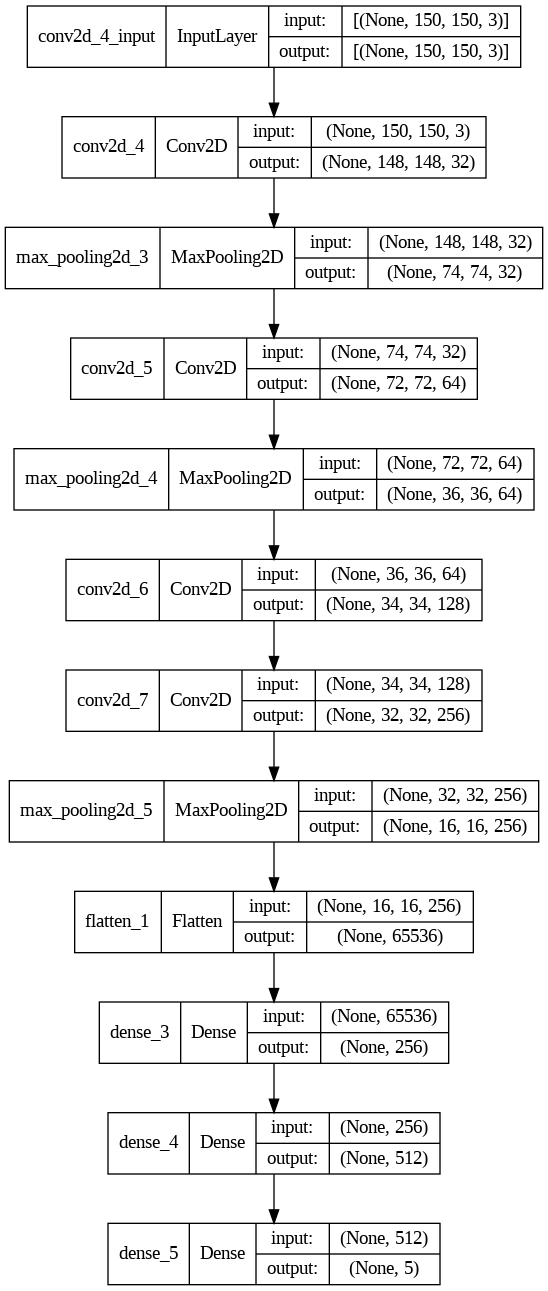

In [ ]:
#Zadanie 3 - sieć
plot_model(classifier.model, to_file='model.png', show_shapes=True, show_layer_names=True)

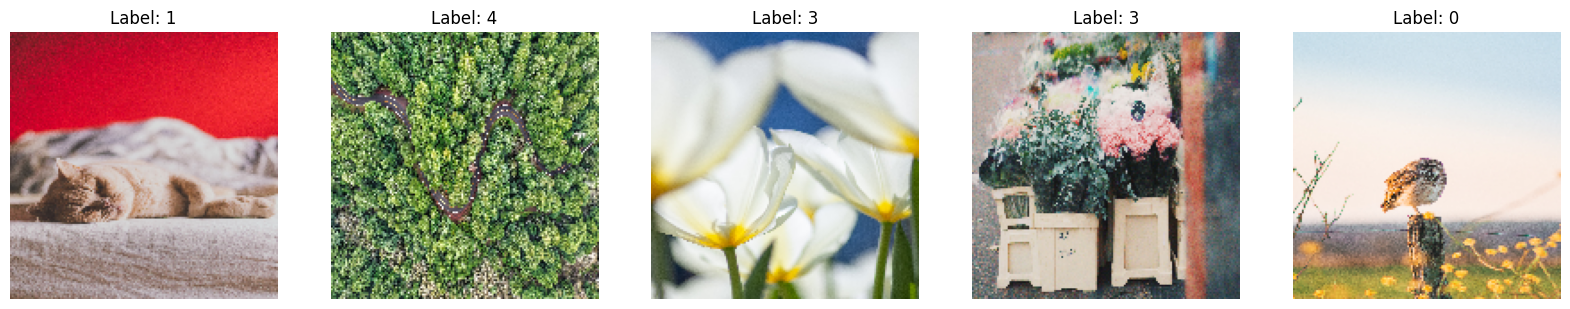

In [ ]:
#Zadanie 5 - obrazki
import matplotlib.pyplot as plt
import numpy as np

def visualize_images(generator, num_images=5):
    # Get a batch of images and labels
    image_batch, label_batch = next(generator)
    
    # Choose random images to visualize
    idxs = np.random.choice(range(generator.batch_size), size=num_images, replace=False)
    image_batch = image_batch[idxs]
    label_batch = label_batch[idxs]
    
    # Create a grid of images and their labels
    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(20, 20))
    for i, (image, label) in enumerate(zip(image_batch, label_batch)):
        axes[i].imshow(image)
        axes[i].set_title(f"Label: {np.argmax(label)}")
        axes[i].axis("off")
     

visualize_images(classifier.validation_data, num_images=5)
     